In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
X = diabetes.data
y = diabetes.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(24, input_shape=(X_train.shape[1],), activation='relu', name='input'))
model.add(Dense(12, activation='relu', name='hidden-1'))
model.add(Dense(6, activation='relu', name='hidden-2'))
model.add(Dense(1, name='output'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 24)                264       
                                                                 
 hidden-1 (Dense)            (None, 12)                300       
                                                                 
 hidden-2 (Dense)            (None, 6)                 78        
                                                                 
 output (Dense)              (None, 1)                 7         
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

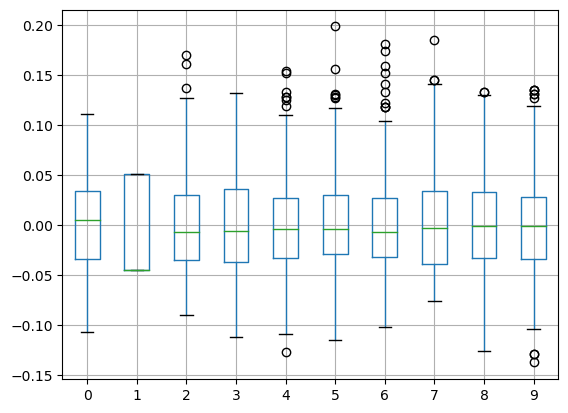

In [9]:
import pandas as pd
pd.DataFrame(X_train).boxplot()

In [11]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
hist = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
9/9 [==============================] - 1s 22ms/step - loss: 30442.1387 - mse: 30442.1387 - mae: 155.2101 - val_loss: 27693.1484 - val_mse: 27693.1484 - val_mae: 149.5682
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 30432.1250 - mse: 30432.1250 - mae: 155.1775 - val_loss: 27681.7363 - val_mse: 27681.7363 - val_mae: 149.5302
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 30418.5039 - mse: 30418.5039 - mae: 155.1345 - val_loss: 27666.8281 - val_mse: 27666.8281 - val_mae: 149.4812
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 30401.3750 - mse: 30401.3750 - mae: 155.0809 - val_loss: 27648.3320 - val_mse: 27648.3320 - val_mae: 149.4206
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 30379.9141 - mse: 30379.9141 - mae: 155.0145 - val_loss: 27625.4590 - val_mse: 27625.4590 - val_mae: 149.3459
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 30353.7656 - mse: 30353

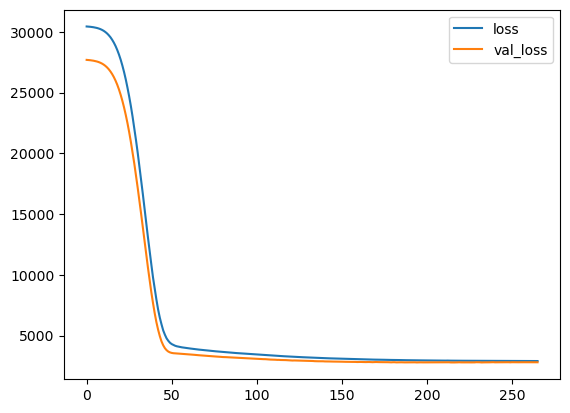

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

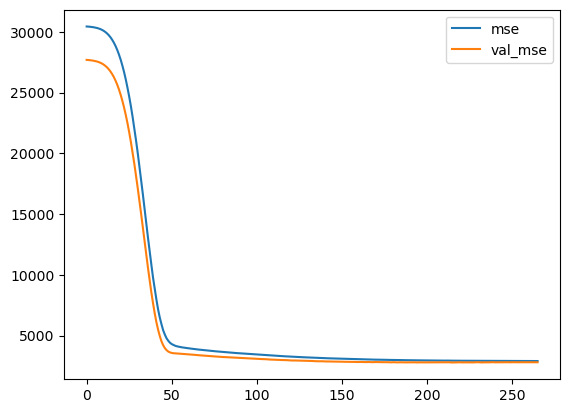

In [14]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse', 'val_mse'])
plt.show()

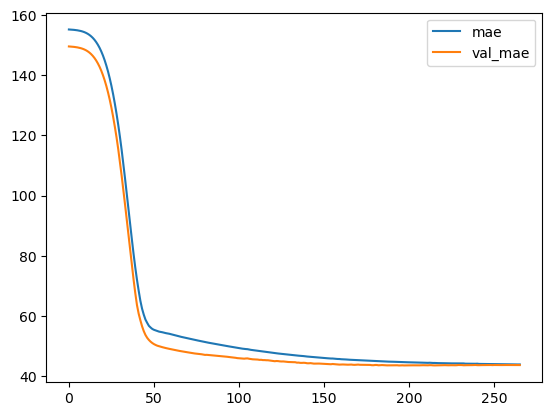

In [15]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.show()

In [16]:
scores = model.evaluate(X_train, y_train)
print(scores)

12/12 [==============================] - 0s 2ms/step - loss: 2885.3735 - mse: 2885.3735 - mae: 43.7577
[2885.37353515625, 2885.37353515625, 43.75765609741211]


In [17]:
scores = model.evaluate(X_test, y_test)
print(scores)

3/3 [==============================] - 0s 2ms/step - loss: 2955.1797 - mse: 2955.1797 - mae: 42.2479
[2955.1796875, 2955.1796875, 42.24790573120117]


In [19]:
from sklearn.metrics import r2_score
pred = model.predict(X_test)
r2_score(y_test, pred)

3/3 [==============================] - 0s 1ms/step


0.4064831356574101